
## Assignment 3 :-  K-Means Clustering

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# Importing the data set

data = pd.read_csv('C:/Users/Dell/Downloads/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = data.drop(columns = ['CustomerID'])
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


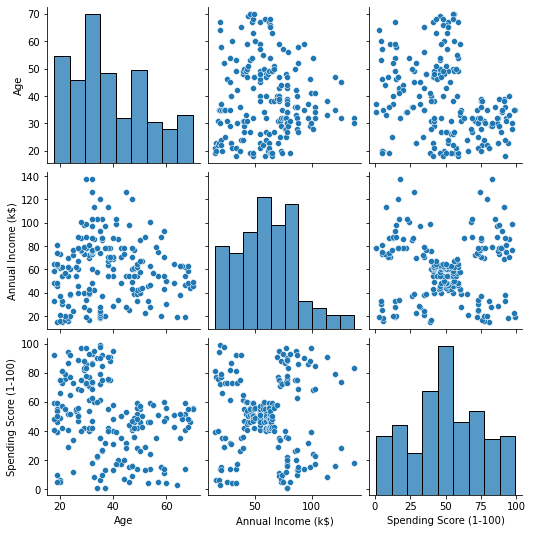

In [5]:
# EDA / Visualization
sns.pairplot(data)

In [6]:
data.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

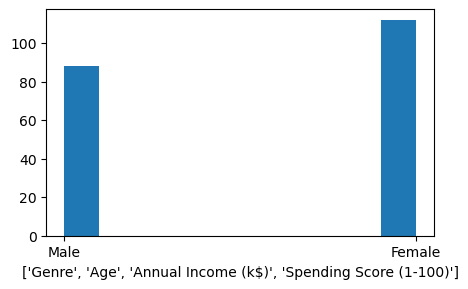

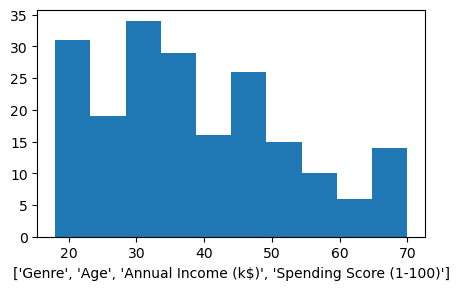

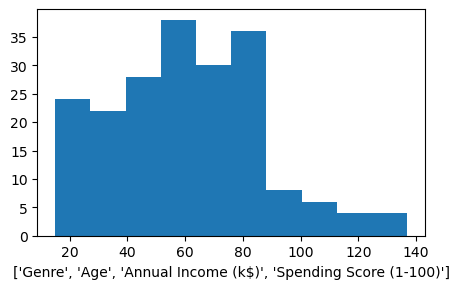

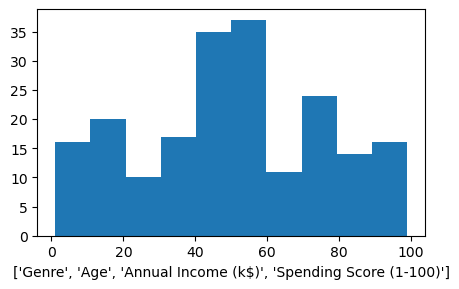

In [7]:
col = ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in col:
    plt.figure(figsize =(5,3), dpi = 100)
    plt.hist(x = i, data = data)
    plt.xlabel(col)
    plt.show()

In [8]:
data.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
data['Genre'] = data['Genre'].map({'Male':1,'Female':2 }) # we can use get_dummies instead of mapping
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


In [11]:
data.dtypes

Genre                     int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

 ## Scaling Transformation or Standardization
 ZScore normalization using Standard Scaler (same mean)


In [12]:
df_customer = data.iloc[:,2:4]
df_customer.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(df_customer)
data_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [14]:
# Finding the optimal number of K
wcss= []

for i in range(2,11):
    kmodel = KMeans(n_clusters = i, init = 'random')
    kmodel.fit(data_scaled)
    wcss.append(kmodel.inertia_)

In [15]:
wcss

[270.1559035072792,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 46.85522014153862,
 37.19454682305569,
 32.40665967645661,
 29.808667456954815]

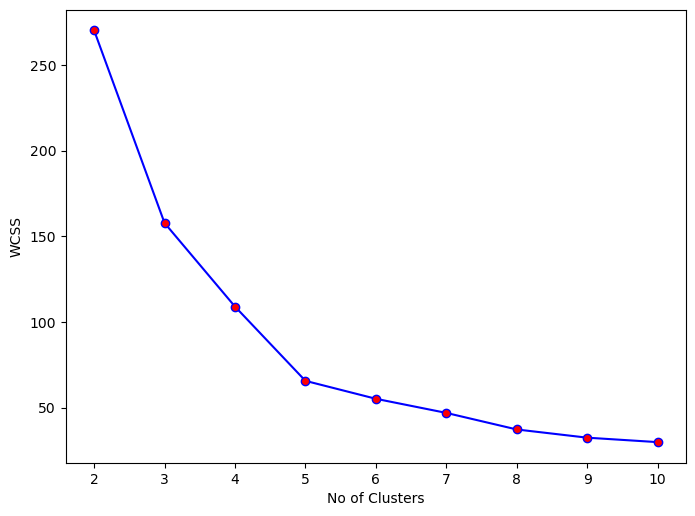

In [16]:
# Plotting
plt.figure(figsize = (8,6), dpi=100)
plt.plot(range(2,11),wcss, marker = 'o', c='blue', markerfacecolor='red')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
# Creating the final Kmeans model with no of clusters = 5

Kmodel_final = KMeans(n_clusters = 5, init = 'k-means++').fit(data_scaled)

In [18]:
cl = Kmodel_final.predict(data_scaled)

In [19]:
cl

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [20]:
# Adding the clusters to a new column in the dataset
df_customer['cl']=cl
df_customer.head()

,Annual Income (k$),Spending Score (1-100),cl
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


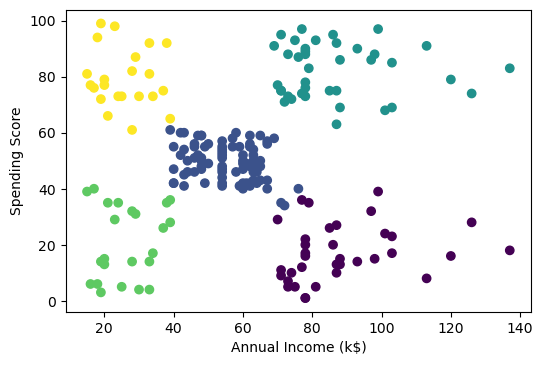

In [21]:
# Visualization of clusters
plt.figure(figsize = (6,4), dpi = 100)
plt.scatter(x = df_customer['Annual Income (k$)'],y = df_customer['Spending Score (1-100)'], c = cl)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

# Inference

From the above plot we can see that data is clustered into 5 clusters.

The green cluster indicates the people that have low annual income and have a low spending score indicating that they are low spenders.

The purple cluster shows the people who have a high annual income but a low spending score. This indicates that there is a group of people who despite having a high income do not spend much.

The yellow cluster shows the people who have high spending score but a low annual income. 

The blue cluster shows people who have a moderate income and a moderate spending score.

The top right cluster show the group of people who have a high income and high spending tendancies.


